<a href="https://colab.research.google.com/github/empyreanlee/Machine-Learning/blob/main/validation_%26_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [3]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [4]:
scale_factor = 1000.0
# Scale the training and test sets labels.
train_df["median_house_value"] /= scale_factor
test_df["median_house_value"] /= scale_factor

In [5]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, my_epochs,
                my_batch_size=None, my_validation_split=0.1):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [6]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()

  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 39608.5547 - root_mean_squared_error: 199.0190 - val_loss: 48016.3164 - val_root_mean_squared_error: 219.1263
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 22781.3516 - root_mean_squared_error: 150.9349 - val_loss: 28074.0039 - val_root_mean_squared_error: 167.5530
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 12077.0010 - root_mean_squared_error: 109.8954 - val_loss: 15208.9521 - val_root_mean_squared_error: 123.3246
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7218.1387 - root_mean_squared_error: 84.9596 - val_loss: 9474.9102 - val_root_mean_squared_error: 97.3391
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6512.3682 - root_mean_squared_error: 80.6992 - val_loss: 9378.3457 - val_root_mean_squared_error: 96.8419
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6513.2817 - ro

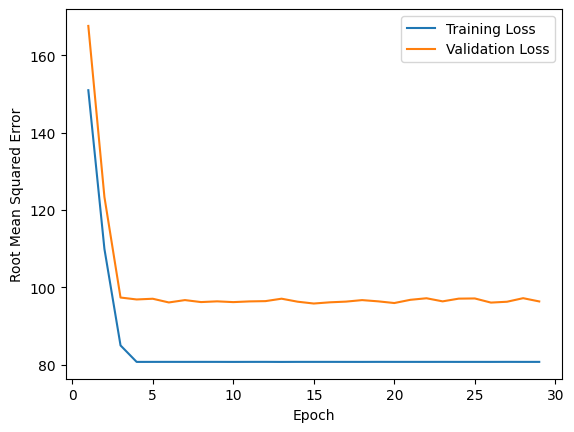

In [7]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

validation_split = 0.2

my_feature = "median_income"
my_label = "median_house_value"

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])